# Module

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np
from scipy.stats import ttest_ind

c:\Users\kitak\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Import Dataset
Dataset from kaggle

In [ ]:
import kagglehub
path = kagglehub.dataset_download("amirmotefaker/ab-testing-dataset")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\kitak\.cache\kagglehub\datasets\amirmotefaker\ab-testing-dataset\versions\1


In [5]:
df = pd.read_csv(r"C:\Users\kitak\.cache\kagglehub\datasets\amirmotefaker\ab-testing-dataset\versions\1\control_group.csv",encoding="latin1", sep=';')
dftest = pd.read_csv(r"C:\Users\kitak\.cache\kagglehub\datasets\amirmotefaker\ab-testing-dataset\versions\1\test_group.csv",encoding="latin1", sep=';')

# EDA & Preparing Data
สำรวจข้อมูล เปรียบเทียบค่าต่างๆด้วย Barchart

In [42]:
df = df.dropna()
df

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
5,Control Campaign,6.08.2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0
6,Control Campaign,7.08.2019,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0
7,Control Campaign,8.08.2019,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0
8,Control Campaign,9.08.2019,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0
9,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0
10,Control Campaign,11.08.2019,2490,115247.0,95843.0,8137.0,2941.0,2486.0,1887.0,475.0


In [7]:
dftest = dftest.dropna()
dftest

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768
5,Test Campaign,6.08.2019,2458,42684,31489,7488,1854,1073,882,488
6,Test Campaign,7.08.2019,2838,53986,42148,4221,2733,2182,1301,890
7,Test Campaign,8.08.2019,2916,33669,20149,7184,2867,2194,1240,431
8,Test Campaign,9.08.2019,2652,45511,31598,8259,2899,2761,1200,845
9,Test Campaign,10.08.2019,2790,95054,79632,8125,2312,1804,424,275


In [8]:
dfuni = pd.concat([df,dftest],ignore_index=True)
dfuni

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,6.08.2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0
5,Control Campaign,7.08.2019,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0
6,Control Campaign,8.08.2019,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0
7,Control Campaign,9.08.2019,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0
8,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0
9,Control Campaign,11.08.2019,2490,115247.0,95843.0,8137.0,2941.0,2486.0,1887.0,475.0


In [41]:
ct = df['# of Purchase'].sum()
t = dftest['# of Purchase'].sum()
print(f"Total purchase in Control campaign : {ct}")
print(f"Total purchase in Test campaign : {t}")

Total purchase in Control campaign : 15161.0
Total purchase in Test campaign : 15637


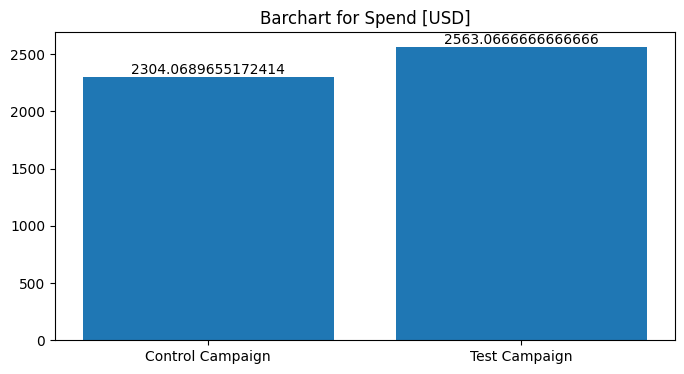

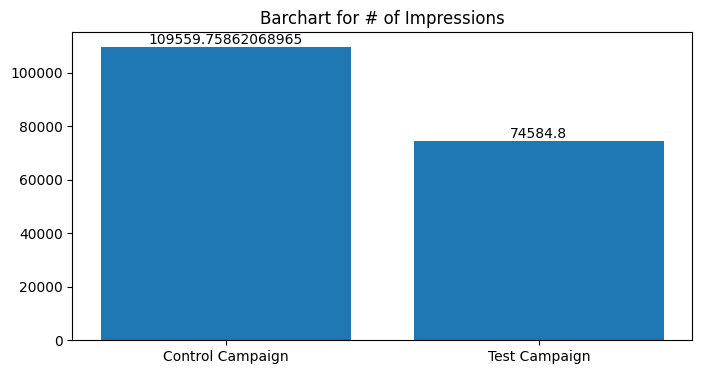

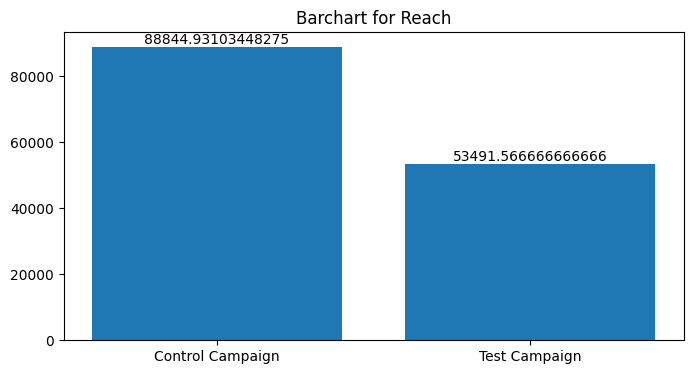

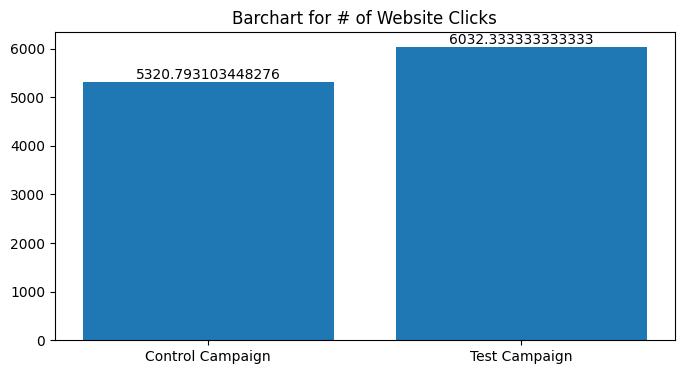

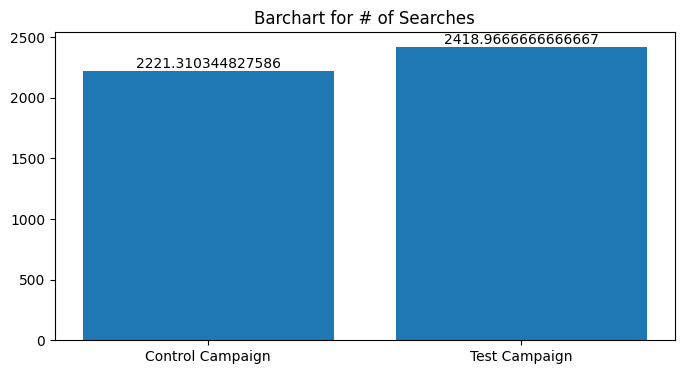

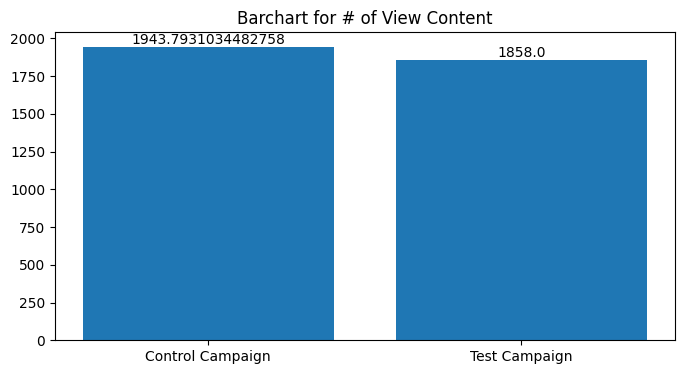

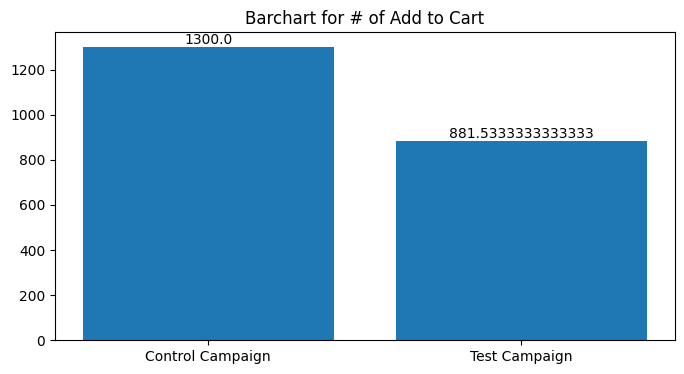

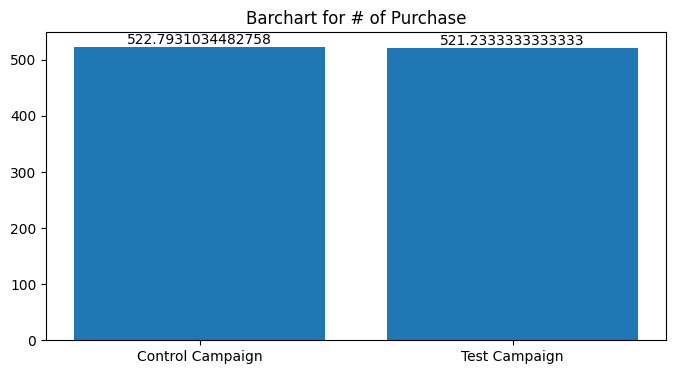

In [59]:
# Function to add value labels on top of bars
def add_labels(x, y,fontsize):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center', va='bottom', fontsize=fontsize)  # Placing text slightly above the bar
for a in [  'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase'] :
    dd = dfuni.groupby('Campaign Name')[a].mean()
    plt.figure(figsize=(8,4))
    # แปลงเป็น DataFrame และสร้าง index ใหม่
    dd = dd.reset_index()
    plt.title(f'Barchart for {a}')
    plt.bar(dd['Campaign Name'],dd[a])
    add_labels(dd['Campaign Name'],dd[a], fontsize=10)

# A/B Testing
หลังจากที่ EDA พิจารณาข้อมูลด้วยกราฟแล้วก็จะพบว่ามีบางค่าที่ดูใกล้เคียงกันมาก เช่น # of View Content และ # of Purchase ส่วนค่าอื่นๆต่างกันอย่างเห็นได้ชัด

และเพื่อความมั่นใจในการตัดสินใจ เราจะลองตรวจสอบความแตกต่างของ 2 Campaign นี้ ด้วย A/B testing ครับ

In [53]:
# สมมติ dfuni มี Campaign A และ B
A = dfuni[dfuni['Campaign Name'] == 'Control Campaign']['# of Purchase']
for i in [  'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase'] :
    B = dfuni[dfuni['Campaign Name'] == 'Test Campaign'][i]

    # A/B t-test
    t_stat, p_val = ttest_ind(A, B, equal_var=False)

    print(f'สมมติฐานสำหรับ ตัวแปร *{i}* พบว่า')
    print("T-statistic:", t_stat)
    print("P-value:", p_val)
    # สรุปผล
    alpha = 0.05
    
    if p_val < alpha:
        print("Reject H0 → Campaign มีความแตกต่างกันอย่างมีนัยสำคัญ")
    else:
        print("Fail to Reject H0 → Campaign ไม่ได้ต่างกันอย่างมีนัยสำคัญ")
    print('-'*70)


สมมติฐานสำหรับ ตัวแปร *Spend [USD]* พบว่า
T-statistic: -28.203321695755957
P-value: 5.2528488175287885e-30
Reject H0 → Campaign มีความแตกต่างกันอย่างมีนัยสำคัญ
----------------------------------------------------------------------
สมมติฐานสำหรับ ตัวแปร *# of Impressions* พบว่า
T-statistic: -12.628579126174017
P-value: 2.592379199145294e-13
Reject H0 → Campaign มีความแตกต่างกันอย่างมีนัยสำคัญ
----------------------------------------------------------------------
สมมติฐานสำหรับ ตัวแปร *Reach* พบว่า
T-statistic: -10.074940442105069
P-value: 5.564779625600499e-11
Reject H0 → Campaign มีความแตกต่างกันอย่างมีนัยสำคัญ
----------------------------------------------------------------------
สมมติฐานสำหรับ ตัวแปร *# of Website Clicks* พบว่า
T-statistic: -17.555988977491943
P-value: 3.141324339487681e-17
Reject H0 → Campaign มีความแตกต่างกันอย่างมีนัยสำคัญ
----------------------------------------------------------------------
สมมติฐานสำหรับ ตัวแปร *# of Searches* พบว่า
T-statistic: -24.04675867264

In [66]:
# สมมติ dfuni มี Campaign A และ B
A = dfuni[dfuni['Campaign Name'] == 'Control Campaign']['# of Purchase']
for i in [  'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase'] :
    B = dfuni[dfuni['Campaign Name'] == 'Test Campaign'][i]

    # A/B t-test
    t_stat, p_val = ttest_ind(A, B, equal_var=False)
    one_tale_ttest = p_val/2
    print(f'สมมติฐานสำหรับ ตัวแปร *{i}* พบว่า')
    print("T-statistic:", t_stat)
    print("P-value:", one_tale_ttest)
    # สรุปผล
    alpha = 0.05
    
    if p_val < alpha:
        print("Reject H0 → Campaign มีความแตกต่างกันอย่างมีนัยสำคัญ")
    else:
        print("Fail to Reject H0 → Campaign ไม่ได้ต่างกันอย่างมีนัยสำคัญ")
    print('-'*70)


สมมติฐานสำหรับ ตัวแปร *Spend [USD]* พบว่า
T-statistic: -28.203321695755957
P-value: 2.6264244087643942e-30
Reject H0 → Campaign มีความแตกต่างกันอย่างมีนัยสำคัญ
----------------------------------------------------------------------
สมมติฐานสำหรับ ตัวแปร *# of Impressions* พบว่า
T-statistic: -12.628579126174017
P-value: 1.296189599572647e-13
Reject H0 → Campaign มีความแตกต่างกันอย่างมีนัยสำคัญ
----------------------------------------------------------------------
สมมติฐานสำหรับ ตัวแปร *Reach* พบว่า
T-statistic: -10.074940442105069
P-value: 2.7823898128002496e-11
Reject H0 → Campaign มีความแตกต่างกันอย่างมีนัยสำคัญ
----------------------------------------------------------------------
สมมติฐานสำหรับ ตัวแปร *# of Website Clicks* พบว่า
T-statistic: -17.555988977491943
P-value: 1.5706621697438407e-17
Reject H0 → Campaign มีความแตกต่างกันอย่างมีนัยสำคัญ
----------------------------------------------------------------------
สมมติฐานสำหรับ ตัวแปร *# of Searches* พบว่า
T-statistic: -24.046758672

หลังจาก A/B testing เราจะเห็นว่าค่าของ # of View Content สถิติทดสอบสรุปให้ว่าเป็นมีความแตกต่างกันอย่างมีนัยยะสำคัญ ส่วน # of Purchase ไม่มีความแตกต่างกันอย่างมีนัยยะสำคัญ และตัวแปรอื่นๆแตกต่างกันอย่างมีนัยยะสำคัญทั้งหมดครับ

ซึ่งจากข้อสรุปจากการสมมติฐาน และการใช้สถิติทดสอบได้คำตอบแตกต่างกัน จะช่วยให้เราสามารถพิจารณาการตัดสินใจได้มากขึ้นครับ